# Some FEM Solutions to 1D equations

In [36]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

## Poisson's Equation 1D

Comparison of FEM and exact solutions for the following equation

$$ \frac{d^2T}{dx^2} = -50 e^x $$

with boundary conditions $T(\pm 1) = 100 $

In [9]:
# problem boundaries
x_start, x_end = -1.0, 1.0
x = np.linspace(x_start, x_end, 100)

Exact solution can easily be determined by integrating twice and is given by 
$$ T = -50 e^{-x} + 50sinh(1)x + 50cosh(1) + 100 $$

Text(0, 0.5, 'T (exact)')

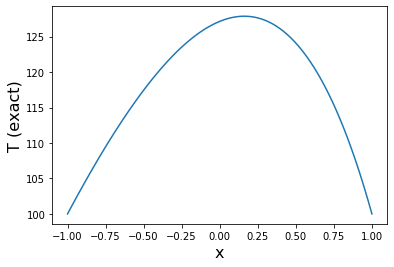

In [29]:
# exact solution
T_ex = -50*np.exp(x) + 50*np.sinh(1)*x + 50*np.cosh(1) + 100

# plot solution and format the graph
plt.plot(x,T_ex)
plt.xlabel('x', fontsize=16)
plt.ylabel('T (exact)', fontsize=16)

### FEM Solution by method of collocation
